Importing libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

Creating a function to generate an AR process time series

In [13]:
from statsmodels.tsa.arima_process import ArmaProcess

def gen_series(ar, ma, length):
    ar_process = ArmaProcess(ar, ma)
    np.random.seed(500)

    X= ar_process.generate_sample(nsample=length)
    return X

In [14]:
ar_params = np.array([0.5]) # phi_1 = 0.5, phi_2 = 0.46
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

Creating a function to plot time series

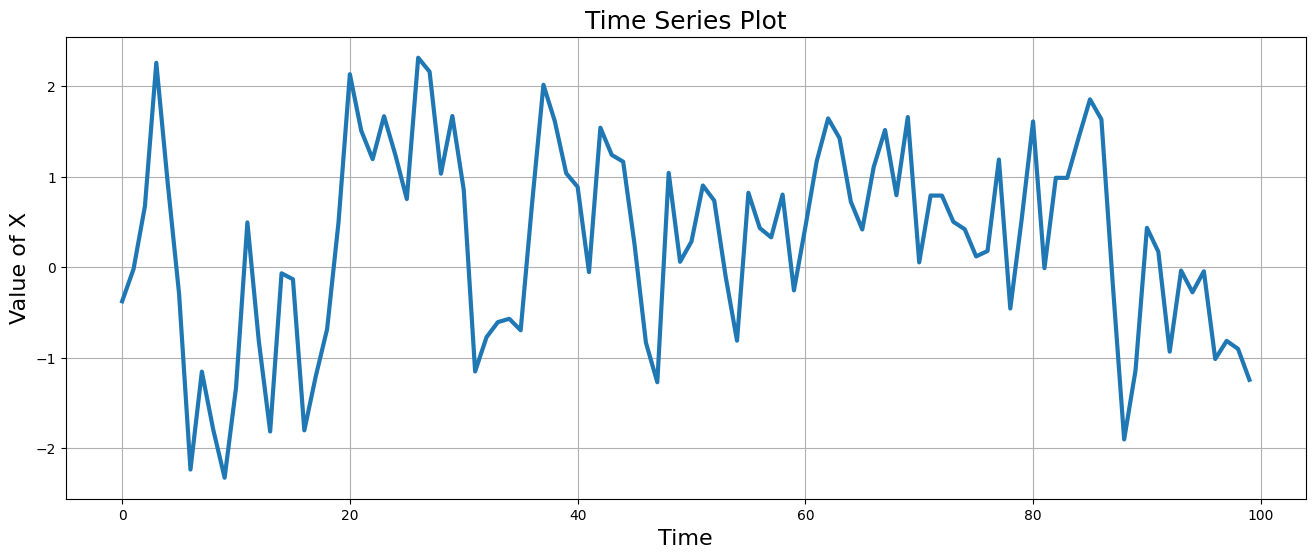

In [15]:
def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

plot_series(X)

Defining a function to perform ADF test

In [16]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [17]:
perform_adf_test(X)

ADF Statistic: -4.787847
p-value: 0.000057
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

For non-stationary data example


In [18]:
ar_params = np.array([1]) # phi_1 = 1
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

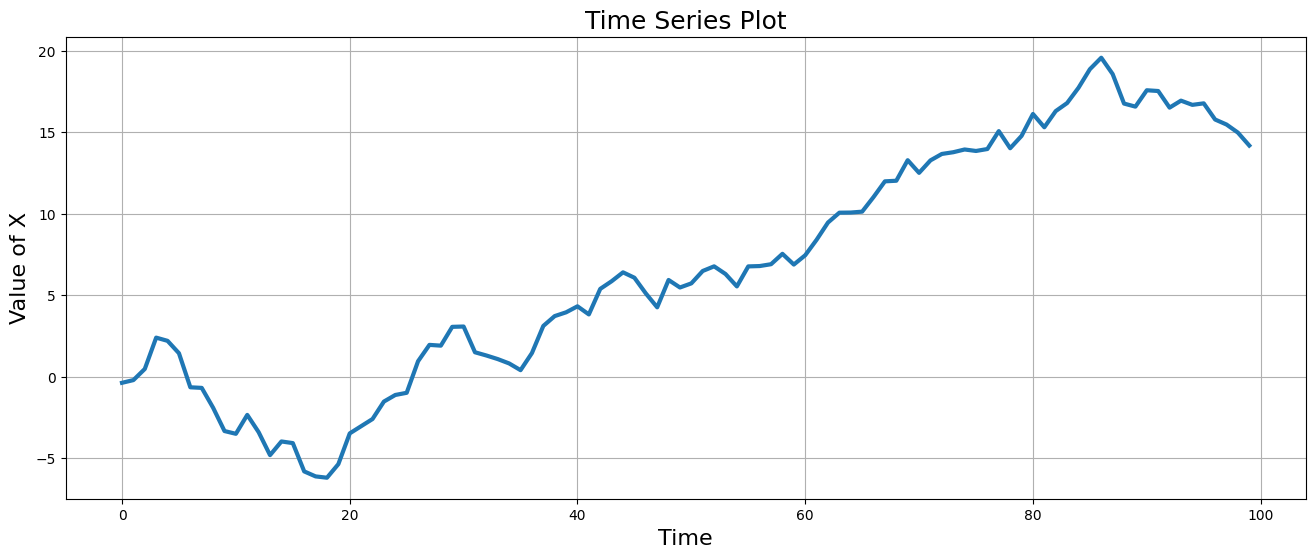

ADF Statistic: -0.531829
p-value: 0.885654
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [19]:
plot_series(X)
perform_adf_test(X)

We can see that the value is larger than the critical values, meaning that we can fail to reject the null hypothesis so accpet the null hypothesis and in turn that the time series is non-stationary.

Some more examples 

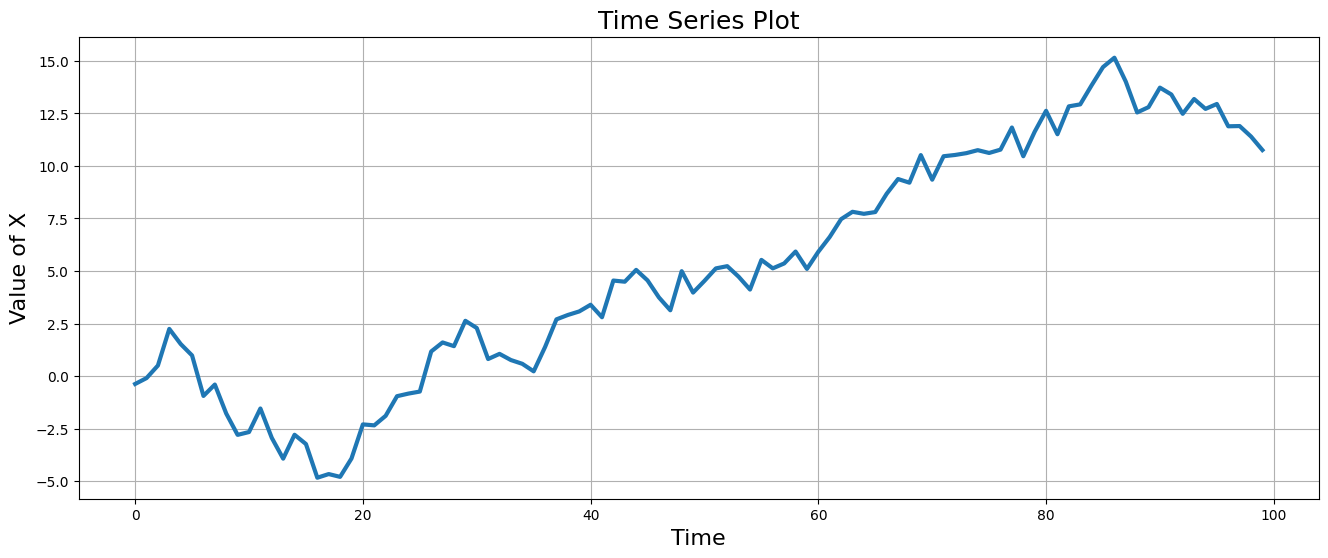

ADF Statistic: -0.745267
p-value: 0.834674
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [22]:
ar_params = np.array([.7, .3 ]) # phi_1 = 1
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

plot_series(X)
perform_adf_test(X)

ADf statistic is higher so data is non stationary

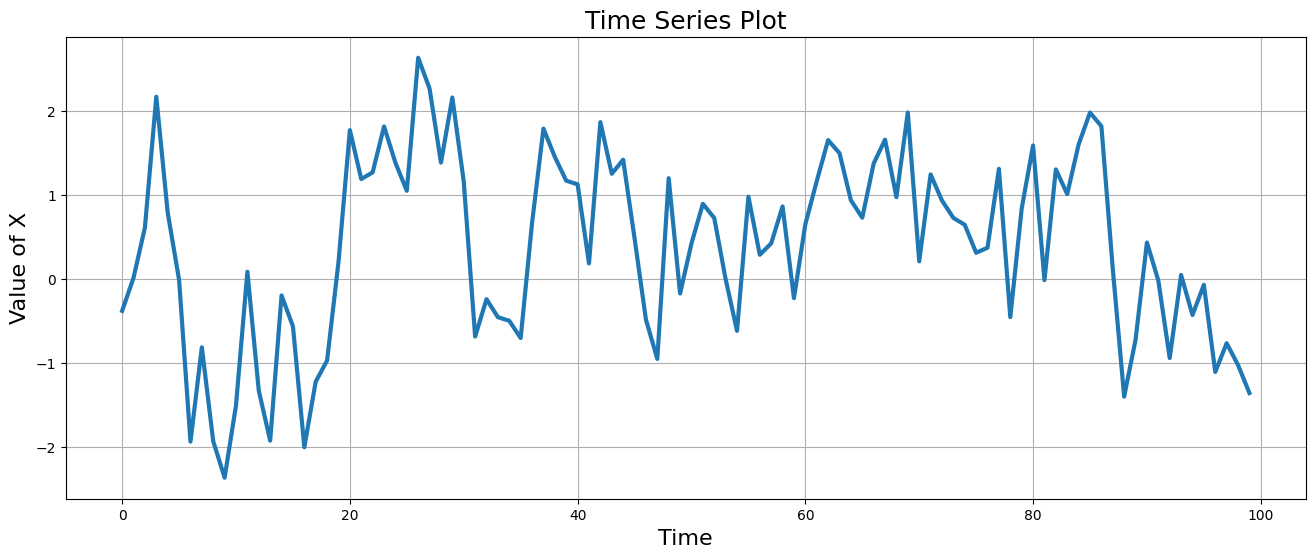

ADF Statistic: -4.522833
p-value: 0.000179
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [23]:
ar_params = np.array([.4, .2 ]) # phi_1 = 1
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

plot_series(X)
perform_adf_test(X)

ADf statistic is lower than critical values as well as p-value is less than 0.05. So,  data is stationary